In [8]:
#arbol de decision - regresion - consumo de gasolina

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## arbol de decisiones
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## librerias metricas 
from sklearn import metrics


## modulo matematico 
from scipy import stats

# invorporar data 
gasolina = pd.read_csv('./datasets/petrol_consumption.csv')

gasolina.describe()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.0000,48.0000,48.0000,48.0000,48.0000
mean,7.6683,4241.8333,5565.4167,0.5703,576.7708
std,0.9508,573.6238,3491.5072,0.0555,111.8858
min,5.0000,3063.0000,431.0000,0.4510,344.0000
25%,7.0000,3739.0000,3110.2500,0.5298,509.5000
50%,7.5000,4298.0000,4735.5000,0.5645,568.5000
75%,8.1250,4578.7500,7156.0000,0.5952,632.7500
max,10.0000,5342.0000,17782.0000,0.7240,968.0000


In [7]:
#formato para 4 decimales
pd.options.display.float_format = '{:.4f}'.format

datasuma = gasolina.describe().T
datasuma

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0000,7.6683,0.9508,5.0000,7.0000,7.5000,8.1250,10.0000
Average_income,48.0000,4241.8333,573.6238,3063.0000,3739.0000,4298.0000,4578.7500,5342.0000
Paved_Highways,48.0000,5565.4167,3491.5072,431.0000,3110.2500,4735.5000,7156.0000,17782.0000
Population_Driver_licence(%),48.0000,0.5703,0.0555,0.4510,0.5298,0.5645,0.5952,0.7240
Petrol_Consumption,48.0000,576.7708,111.8858,344.0000,509.5000,568.5000,632.7500,968.0000


In [9]:
## revision de ruido en los datos

for k, v in gasolina.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3-q1
    v_col = v[(v <= q1-1.5*irq)| (v>= q3+1.5*irq)]
    porc = np.shape(v_col)[0]* 100/ np.shape(gasolina)[0]

    print("Colimnas %s ruido = %.2f%%" % (k,porc))

Colimnas Petrol_tax ruido = 4.17%
Colimnas Average_income ruido = 0.00%
Colimnas Paved_Highways ruido = 4.17%
Colimnas Population_Driver_licence(%) ruido = 2.08%
Colimnas Petrol_Consumption ruido = 4.17%


<Axes: >

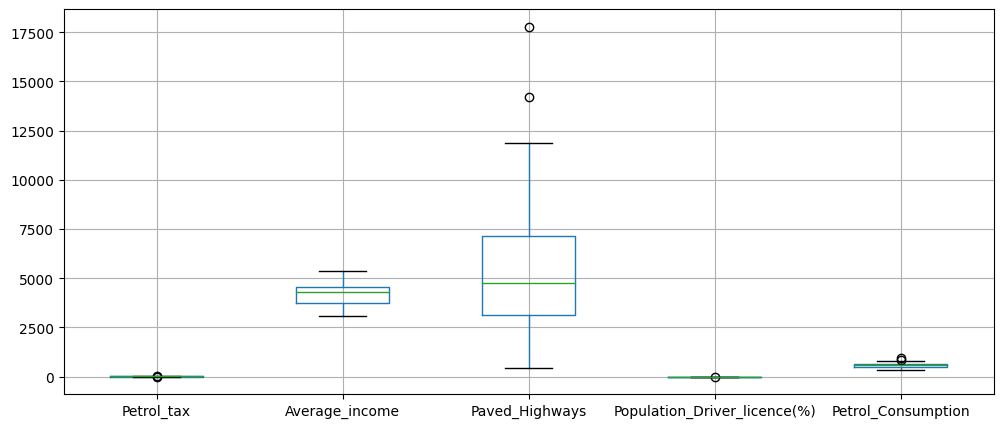

In [10]:
##grafica para ruido en los datos 
plt.figure(figsize=(12,5))
gasolina.boxplot()

In [16]:
## diagrama de corelacion

#gasolina.corr('spearman').T
#gasolina.corr('pearson').T
#gasolina.corr('kendall').T

correlaciogas = gasolina.corr()
correlaciogas

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.0000,0.0127,-0.5221,-0.2880,-0.4513
Average_income,0.0127,1.0000,0.0502,0.1571,-0.2449
Paved_Highways,-0.5221,0.0502,1.0000,-0.0641,0.0190
Population_Driver_licence(%),-0.2880,0.1571,-0.0641,1.0000,0.6990
Petrol_Consumption,-0.4513,-0.2449,0.0190,0.6990,1.0000


<Axes: >

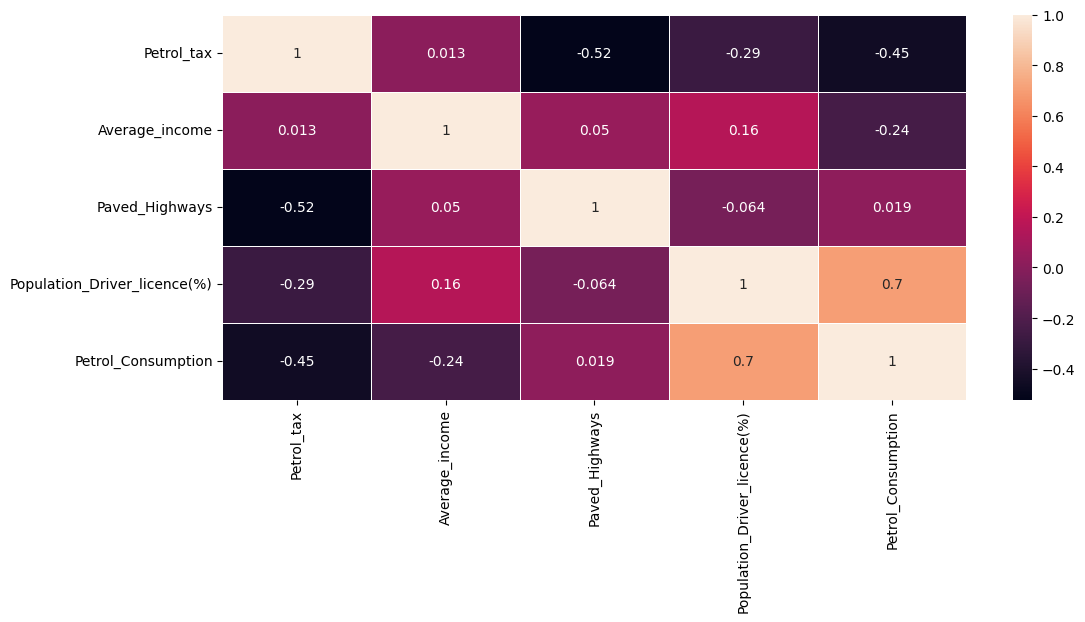

In [17]:
plt.figure(figsize=(12,5))
sns.heatmap(correlaciogas, linewidths=0.5 , annot=True)

In [18]:
## grafica de visualizacion de la regresion 

pearson_coef, p_value =  stats.pearsonr(gasolina['Population_Driver_licence(%)'], gasolina['Petrol_Consumption'])
print('el coeficiente de correlacion de pearson es :', round(pearson_coef),'coun un valor de p de:', p_value)

el coeficiente de correlacion de pearson es : 1 coun un valor de p de: 3.289604948530783e-08


(0.0, 999.2)

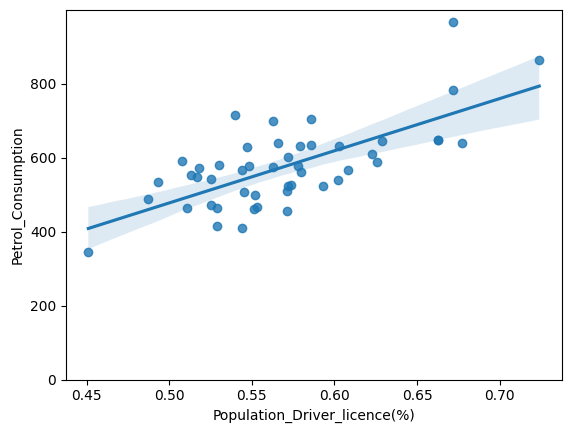

In [19]:
sns.regplot(x='Population_Driver_licence(%)',y='Petrol_Consumption',data=gasolina)
plt.ylim(0,)

/var/folders/6g/wp1f7dnj1fj73b6w8vdl1wvc0000gn/T/ipykernel_50670/3390846867.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gasolina['Petrol_Consumption'])


<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

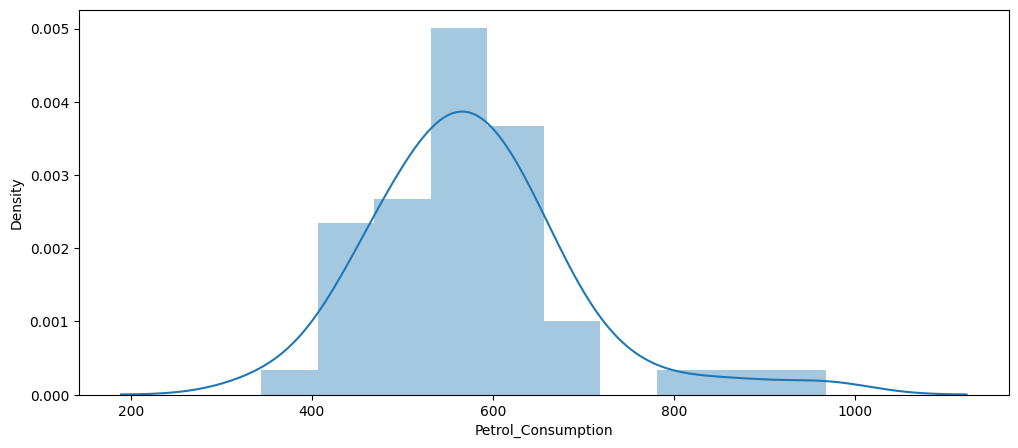

In [20]:
# densidad de histograma sobre la variable 

plt.figure(figsize=(12,5))
sns.distplot(gasolina['Petrol_Consumption'])

In [21]:
#modelo y particion 

x = gasolina.drop(['Petrol_Consumption'], axis=1)
y = gasolina['Petrol_Consumption']

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.30 , random_state=42)
arbol1 = DecisionTreeRegressor(max_depth=4,max_features=4)
arbol1.fit(X_train,y_train)
predicciones = arbol1.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predecido':predicciones})

df.head()

,Actual,Predecido
27,631,586.8000
40,587,663.7500
26,577,543.5000
43,591,663.7500
24,460,543.5000


In [22]:
#metricas 
print('Eficiencia R2 Score: ' ,round(metrics.r2_score(y_test,predicciones),3)*100)
print('Error mediatico cuadratico RMSE ' ,np.sqrt(metrics.mean_squared_error(y_test,predicciones)))
print('error absoluto ' ,metrics.mean_absolute_error(y_test,predicciones))

Eficiencia R2 Score:  54.50000000000001
Error mediatico cuadratico RMSE  97.8123773694652
error absoluto  84.0988888888889


In [25]:
## mejores variables para el arbol de decisiones

varI = arbol1.feature_importances_
pd.DataFrame(pd.Series(varI,index=x.columns).sort_values(ascending=False))

,0
Population_Driver_licence(%),0.6231
Average_income,0.2020
Petrol_tax,0.0999
Paved_Highways,0.0751


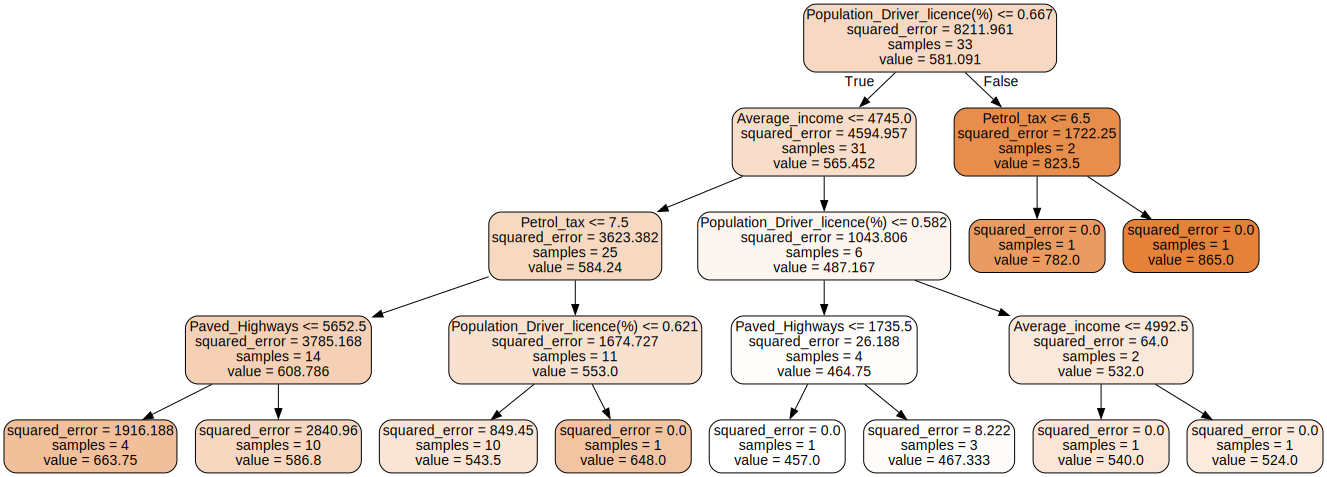

In [34]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(arbol1,filled=True, rounded=True,feature_names=x.columns, out_file=None)
graphviz.Source(dot_data)

In [37]:
#validacion cruzada con gridSearh y cross validation

from sklearn.model_selection import GridSearchCV

## crear la lista de parametros 

param_grid = [{'max_depth': [3,4,5,None], 'max_features':[3,4,5,6,7]}]

## activador de parametros 
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid= param_grid, cv=10)


In [38]:
# se entrena el modelo

gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7]}])

In [39]:
## ver iteraciones y funciones de lor parametros 

gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': 6},
 {'max_depth': 3, 'max_features': 7},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': 6},
 {'max_depth': 4, 'max_features': 7},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': 6},
 {'max_depth': 5, 'max_features': 7},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': 6},
 {'max_depth': None, 'max_features': 7}]

In [40]:
## ver el ranking de testeo de scroe 

gs.cv_results_['rank_test_score']

array([ 9,  1,  1,  1,  1, 15,  5,  5,  5,  5, 20, 16, 16, 16, 16, 10, 11,
       11, 11, 11], dtype=int32)

In [41]:
## revisar el estimador final 
gs.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=4, random_state=42)

In [45]:
## crear modelo parametrizado con arreglos 

arbol2 = DecisionTreeRegressor(max_depth=5, max_features=3, random_state=62)

arbol2.fit(X_train,y_train)
predicciones2 = arbol2.predict(X_test)
df2 = pd.DataFrame({'Actual':y_test, 'Predecido':predicciones2})
df2.head

<bound method NDFrame.head of     Actual  Predecido
27     631   575.5000
40     587   632.0000
26     577   575.5000
43     591   714.0000
24     460   510.0000
37     704   622.8333
12     525   524.0000
19     640   648.0000
4      410   487.0000
25     566   541.4000
8      464   510.0000
3      414   467.3333
6      344   467.3333
39     968   865.0000
33     628   487.0000>

In [46]:
#metricas 
print('Eficiencia R2 Score: ' ,round(metrics.r2_score(y_test,predicciones2),3)*100)
print('Error mediatico cuadratico RMSE ' ,np.sqrt(metrics.mean_squared_error(y_test,predicciones2)))
print('error absoluto ' ,metrics.mean_absolute_error(y_test,predicciones2))

Eficiencia R2 Score:  72.5
Error mediatico cuadratico RMSE  75.97598012237523
error absoluto  62.228888888888875


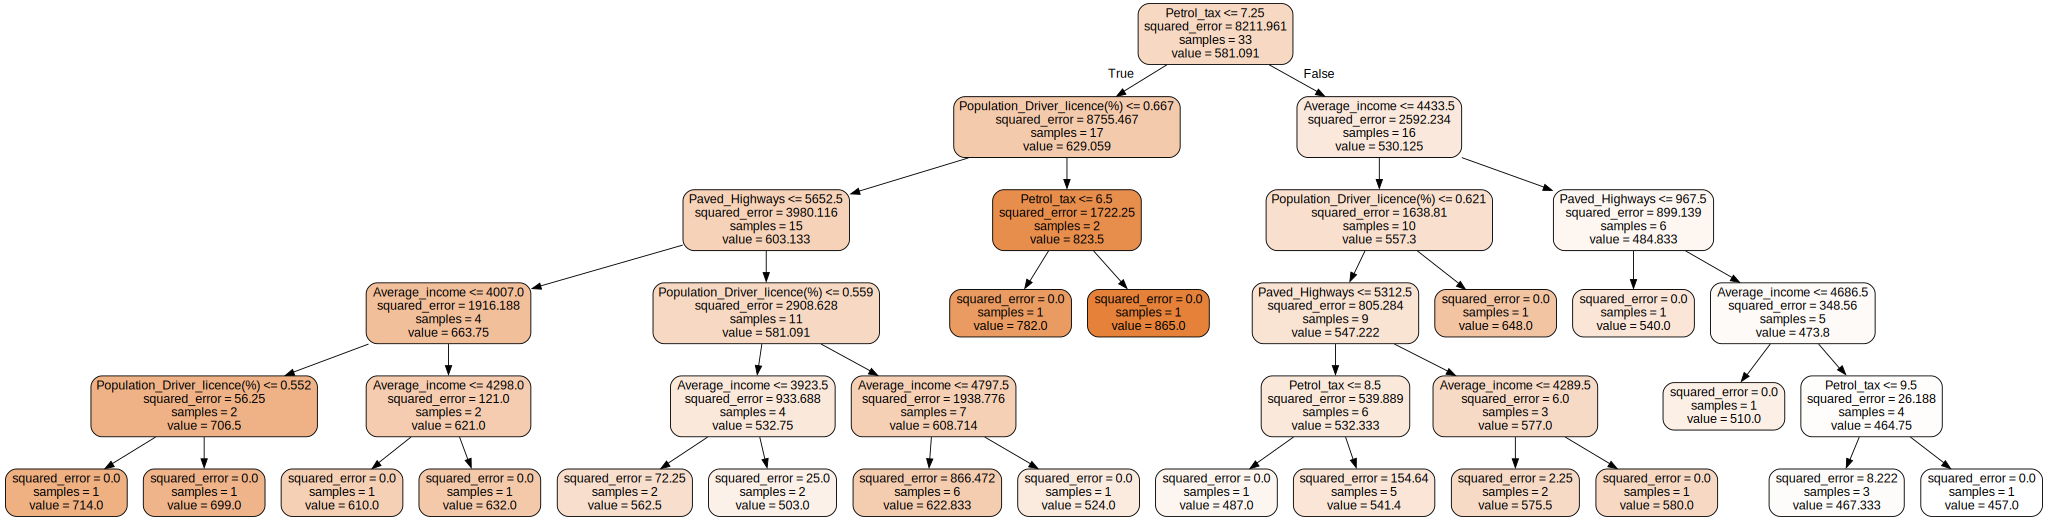

In [47]:
## mostrar el arbold e regresion 
dot_data2 = export_graphviz(arbol2,filled=True, rounded=True,feature_names=x.columns, out_file=None)
graphviz.Source(dot_data2)

In [49]:
## data frame antes y despues 

DT_regresion = [['Max_depth',4,5],['Max_features',4,3],['R2',0.56,0.72],['RMSE',96.03,75.97],['Error_Absoluto',84.78,66.22]]

resumen = pd.DataFrame(DT_regresion, columns=['parametros', 'Sin_gridSearch', 'Con_gridSearch'])
resumen

,parametros,Sin_gridSearch,Con_gridSearch
0,Max_depth,4.0000,5.0000
1,Max_features,4.0000,3.0000
2,R2,0.5600,0.7200
3,RMSE,96.0300,75.9700
4,Error_Absoluto,84.7800,66.2200
